 **Made By :-  Ashu Kumar**

# <center>Email Spam Detection</center>

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline
sns.set(color_codes=True)

**Load the dataset into jupyter notebook**

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


**Generate a binary column where a value of '1' signifies the classification of an email as spam, while a value of '0' indicates that the email is non-spam or legitimate.**

In [4]:
df['Spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",0


**Retrieve the shape of the dataset, which indicates the number of rows and columns it contains.**

In [5]:
df.shape

(5572, 3)

**Conduct an examination of the columns present in the dataset.**

In [6]:
df.columns

Index(['Category', 'Message', 'Spam'], dtype='object')

**Retrieve the information summary of the dataset, including details such as column names, data types, non-null counts, and memory usage.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
 2   Spam      5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


**Conduct an examination of the distinct values present in each column of the dataset.**

In [8]:
df.nunique()

Category       2
Message     5157
Spam           2
dtype: int64

**Perform an assessment of the presence of null values in the columns of the dataset.**

In [9]:
df.isnull().sum()

Category    0
Message     0
Spam        0
dtype: int64

## Data Visualization

**Determine the frequency or count of Spam messages.**

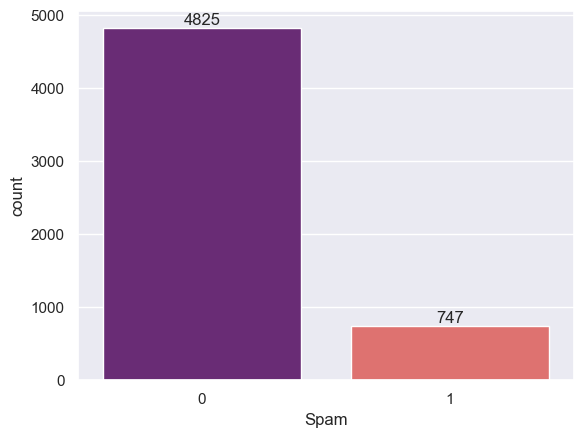

In [10]:
ax = sns.countplot(x='Spam',data=df,palette='magma')
ax.bar_label(ax.containers[0])
plt.show()

There is a total of 4825 no spam or legitimate email and 747 spam email.

**Assigning the features as X and trarget as y and then split the dataset for further modelling**

In [11]:
X = df['Message']  # Message text
y = df['Spam']     # Spam labels (0 for non-spam, 1 for spam)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Create a TF-IDF vectorizer for text feature extraction**

In [12]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**Train a Naive Bayes classifier**

In [13]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

**Make Predictions and Evaluate the model**

In [14]:
# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print model evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.9704035874439462
Confusion Matrix:
 [[966   0]
 [ 33 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

